In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potato diseases/train",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
valid_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potato diseases/validation",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potato diseases/test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 5702 files belonging to 3 classes.
Found 1426 files belonging to 3 classes.
Found 9 files belonging to 3 classes.


In [13]:
class_names=train_dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(valid_dataset)


45

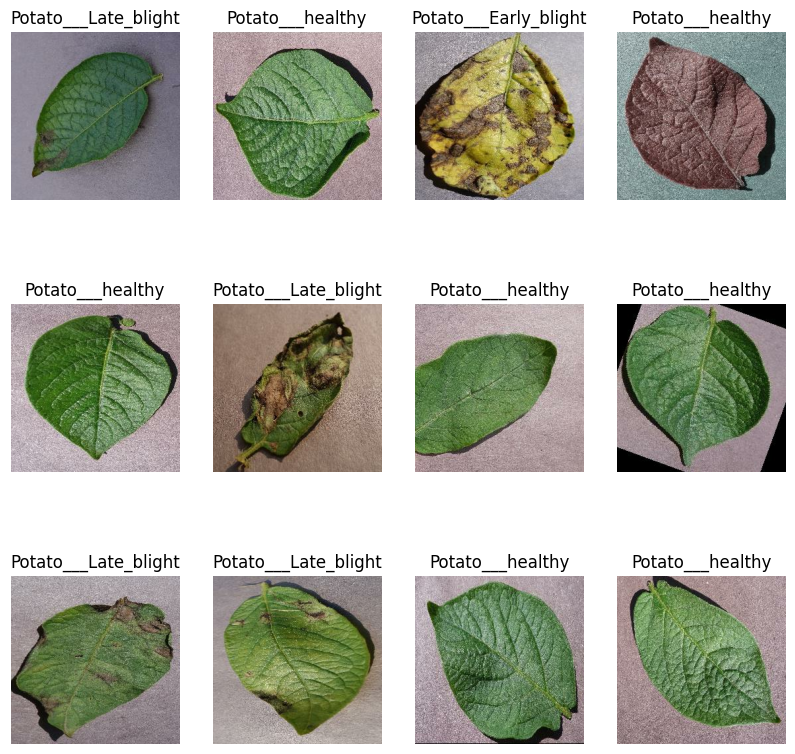

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [4]:
train_ds=train_dataset.take(175)
valid_ds=valid_dataset.take(45)
test_ds=test_dataset.take(1)

In [5]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/50
  5/175 [..............................] - ETA: 5:15 - loss: 1.1047 - accuracy: 0.3438

KeyboardInterrupt: 

In [1]:
history


history


In [16]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 0s 493ms/step - loss: 1.1058 - accuracy: 0.1111


In [2]:
scores

NameError: name 'scores' is not defined

First image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 111ms/step
predicted label: Potato___Early_blight


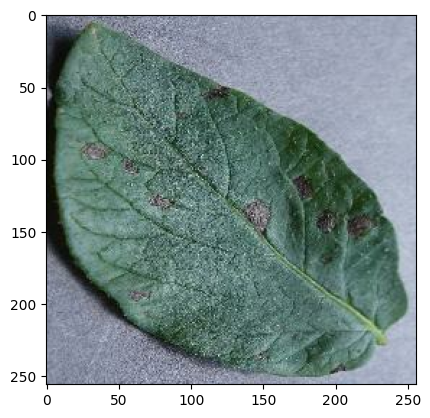

In [14]:
import numpy as np
for images_batch,label_batch in test_ds.take(1):
    first_image = images_batch[1].numpy().astype('uint8')
    first_label = label_batch[1].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[1])])

In [11]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*np.max(predictions[0]),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


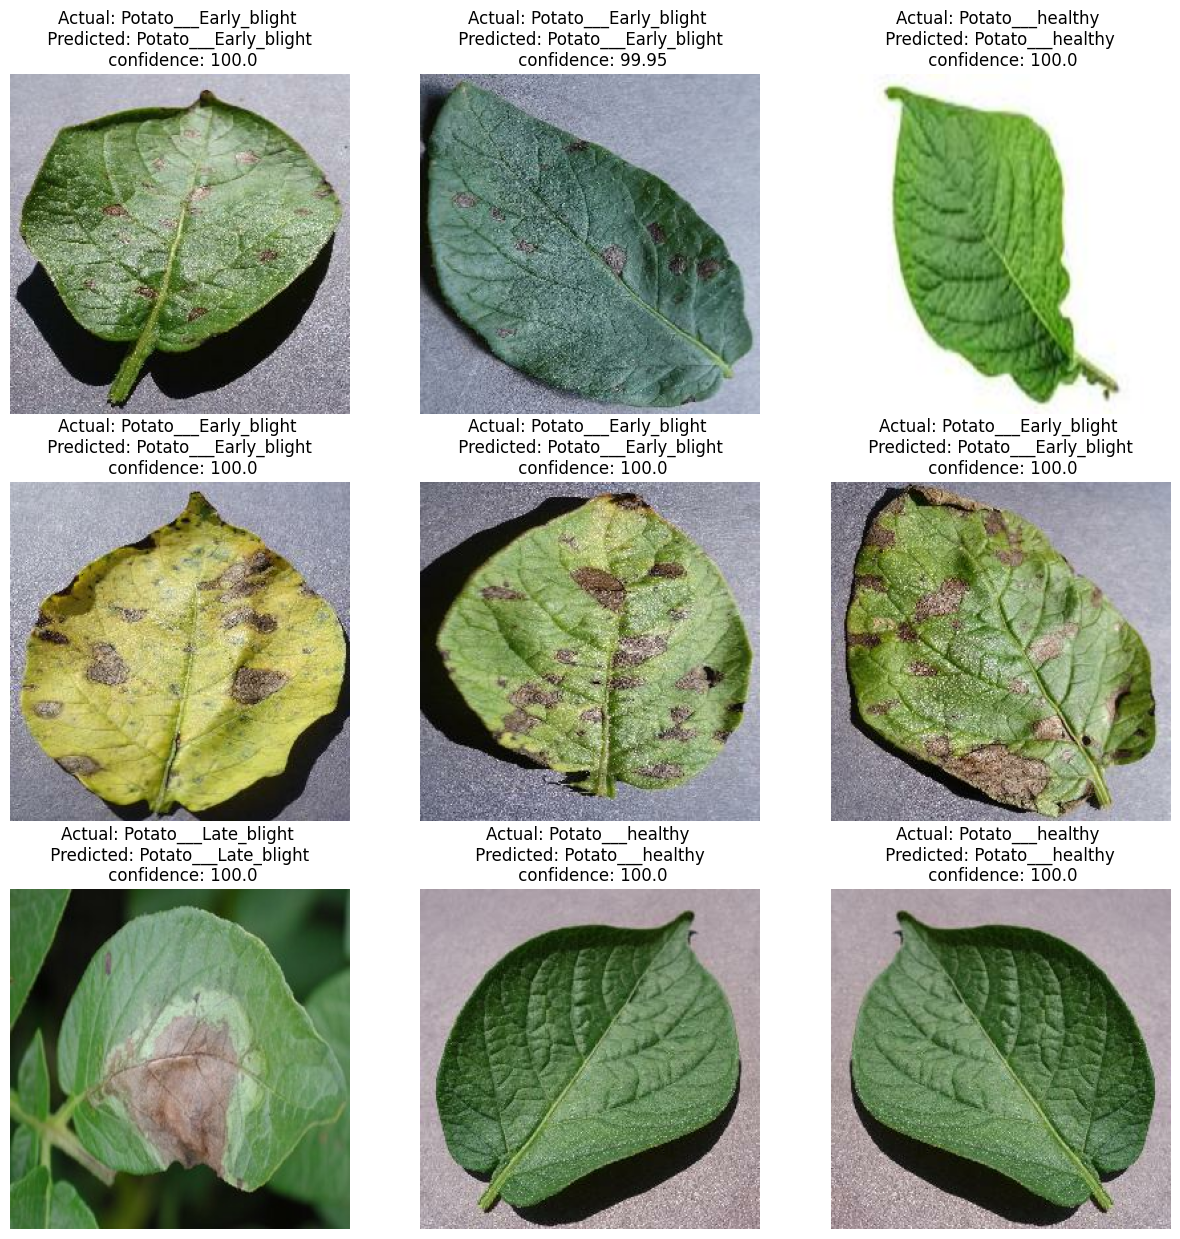

In [16]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n confidence: {confidence}")
        plt.axis("off")

In [7]:
model_version=1
#model.save(f"../models/{model_version}")

In [8]:
model = tf.keras.models.load_model(f"..\models\{model_version}\{model_version}")

In [9]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'